In [ ]:
## HW 4 DATA 445 Due 2021.10.02

In [ ]:
## Q1 What is a perceptron? Be specific.

## A perceptron is a machine learning neural network. Multiple variables can be used as inputs.
## A perceptron has one or more hidden layers that use weight parameters prior to providing the
## inputs to the neurons of the hidden layer (can be a variable number of neurons).
## The neurons then use an activation function to transform the data. The new values are either
## passed to another hidden layer (again, with weights and an activation function) or weighted and passed to the 
## final activation function to generate outputs. A perceptron has a learning rate, which determines how quickly it 
## corrects the model. Essentially, the perceptron "wanders" through various weights in the model, with the goal of 
## approaching a minimum cost value, meaning the most optimal version of the model has been achieved. 

In [ ]:
## Q2  What are the different types of perceptrons? Briefly describe each of them.

## The single layer perceptron has only one hidden layer between the inputs and the output. It can have a variable
## number of neurons in that single layer. The single layer perceptron is only useful for linearly separable
## data, and essentially is a form of linear regression or classification.
## If the data need a more complex separation, a multi layer perceptron (MLP) is used instead.
## The MLP uses a non-linear function in at least one of the layers between the inputs and the outputs. This allows
## much more complex patterns in the data to be successfully modeled.

In [ ]:
## Q3 What is a hard margin in a support vector machine model? Be specific.

## A hard margin is one that does not allow any data points to be on the "wrong side" of the separation or in the margins 
## when separating data.  
## This means the data must be fully separable and that there can be no errors in the classification. This does not work
## for all data sets--instead a "soft margin" must sometimes be used. This allows errors in the classification
## with slack variables (essentially a cost) to penalize for points in the margins, thus minimizing the number of
## points inside the margins and/or incorrectly classified.

In [ ]:
## Q4 The effectiveness of a support vector machine model depends on:

## (d) all of the above (kernel, kernel parameters and penalty cost parameter)

In [ ]:
## Q5 What is/are true about kernel in SVM?
##     (a) Kernel function map low dimensional data into high dimensional space.
##     (b) Kernel function map high dimensional data into low dimensional space.
##     (c) It is a similarity function.

## Answer: (d) a and c

In [1]:
## Q6a  Load the data file to your S3 bucket. Using the pandas library, read the csv data
## file and create a data-frame called heart.

import pandas as pd
import numpy as np
import boto3
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'bonnieh-data-445-bucket'
bucket = s3.Bucket(bucket_name)

## Defining the file to be used
file_key = 'framingham.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## Reading the csv file
heart = pd.read_csv(file_content_stream)
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [2]:
heart.shape

(4238, 16)

In [3]:
## Q6b  Remove observations with missing values.

heart = heart.dropna()
heart.shape

(3656, 16)

Using age, currentSmoker, totChol, BMI, and heartRate as the predictor variables, and TenYearCHD as the target variable, do the following:

(i) Split the data into train (80%) and test (20%).

(ii) Using MinMaxScaler, transform all the input variables in the train and test datasets to 0-1 scale.

• Build a multi-layer perceptron model with one single hidden layer with 4 neurons
(hyperbolic tangent as the activation function) and softmax as the activation function for the output. Use the stochastic descent gradient as the method to estimate
the weights (optimizer = ’sgd’) and metrics = [’accuracy’]. Use epochs =
100 and batch size = 500 to build the model. After that, use the model to predict on the test dataset. Using 15% as the cut-off value, report the recall of this
model.

• Build a multi-layer perceptron model with one single hidden layer with 4 neurons (ReLU as the activation function) and softmax as the activation function for
the output. Use the stochastic descent gradient as the method to estimate the
weights (optimizer = ’sgd’) and metrics = [’accuracy’]. Use epochs = 100
and batch size = 500 to build the model. After that, use the model to predict
on the test dataset. Using 15% as the cut-off value, report the recall of this model.

• Build a support vector machine model using rbf as the kernel. After that, use the
model to predict on the test dataset. Using 15% as the cut-off value, report the
recall of this model.

• Build a support vector machine model using poly as the kernel. After that, use
the model to predict on the test dataset. Using 15% as the cut-off value, report
the recall of this model.

In [4]:
## Q6c Using age, currentSmoker, totChol, BMI, and heartRate as the predictor variables,  
## and TenYearCHD as the target variable, do the following:

## Splitting the data into train and test

X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Scaling all the input variables in the train and test datasets to 0-1 scale.

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

## Model 1: MLP model, 4 neurons, hyberbolic tangent, SoftMax, cutoff = 15%
md1= tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])
    ## compiling & training the model
md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
md1.fit(X_train, 
             tf.keras.utils.to_categorical(Y_train, num_classes = 2), 
             epochs = 100, 
             batch_size = 500, 
             validation_data = (X_test,
                                tf.keras.utils.to_categorical(Y_test, num_classes = 2)),verbose = 0)
    ## predicting the values md1
pred1 = md1.predict(X_test)[:, 1]
pred1 = np.where(pred1 < 0.15, 0, 1)

    ## calculating the recall score md1
recall1 = recall_score(Y_test, pred1)

## Model 2: MLP model, 4 neurons, ReLu, SoftMax, cutoff = 15%
md2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])
    ## compiling and training the model
md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
md2.fit(X_train,
       tf.keras.utils.to_categorical(Y_train, num_classes = 2),
       epochs = 100,
        batch_size = 500,
        validation_data = (X_test,
                          tf.keras.utils.to_categorical(Y_test, num_classes = 2)), verbose = 0)

    ## predicting the values md2
pred2 = md2.predict(X_test)[:, 1]
pred2 = np.where(pred2 < 0.15, 0, 1)

    ## calculating the recall score md2
recall2 = recall_score(Y_test, pred2)

## Model 3: SVM, kernel = rbf, cutoff = 15%
md3 = SVC(kernel = 'rbf', probability = True).fit(X_train, Y_train)

    ## predicting the values
pred3 = md3.predict_proba(X_test)[:,1]
pred3 = np.where(pred3 < 0.15, 0, 1)
    ## calculating the recall md3
recall3 = recall_score(Y_test, pred3)

## Model 4: SVM, kernel = poly, cutoff = 15%
md4 = SVC(kernel = 'poly', probability = True).fit(X_train, Y_train)

    ## predicting the values
pred4 = md4.predict_proba(X_test)[:,1]
pred4 = np.where(pred4 < 0.15, 0, 1)
    ## calculating the recall md3
recall4 = recall_score(Y_test, pred4)

print('The recall value for model 1 = ', round(recall1, 4), ', for model 2 = ', round(recall2, 4), ', for model 3 = ', 
      round(recall3, 4), 'and for model 4 = ', round(recall4, 4))

The recall value for model 1 =  0.2773 , for model 2 =  0.2689 , for model 3 =  0.4286 and for model 4 =  0.3866


In [9]:
## Q6d Repeat part (c) 100 times. Create a visualization that shows the recall value for
## each of the models at each iteration. Also, report the average recall of each of the model for
## the 100 repetitions. What model would use to predict TenYearCHD?

## defining lists to store the recall values for the 100 runs of models 1-4

recalls_md1 = []
recalls_md2 = []
recalls_md3 = []
recalls_md4 = []

for i in range(0, 100):
    ## Splitting the data into train and test

    X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
    Y = heart['TenYearCHD']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

    ## Scaling all the input variables in the train and test datasets to 0-1 scale.

    scaler = MinMaxScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

    ## Model 1: MLP model, 4 neurons, hyberbolic tangent, SoftMax, cutoff = 15%
    md1= tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])
        ## compiling & training the model
    md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    md1.fit(X_train, 
             tf.keras.utils.to_categorical(Y_train, num_classes = 2), 
             epochs = 100, 
             batch_size = 500, 
             validation_data = (X_test,
                                tf.keras.utils.to_categorical(Y_test, num_classes = 2)),verbose = 0)
        ## predicting the values md1
    pred1 = md1.predict(X_test)[:, 1]
    pred1 = np.where(pred1 < 0.15, 0, 1)

        ## calculating the recall score md1
    recall1 = recall_score(Y_test, pred1)
    recalls_md1.append(recall1)

    ## Model 2: MLP model, 4 neurons, ReLu, SoftMax, cutoff = 15%
    md2 = tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
        tf.keras.layers.Dense(2, activation = 'softmax')
    ])
        ## compiling and training the model md2
    md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    md2.fit(X_train,
       tf.keras.utils.to_categorical(Y_train, num_classes = 2),
       epochs = 100,
        batch_size = 500,
        validation_data = (X_test,
                          tf.keras.utils.to_categorical(Y_test, num_classes = 2)), verbose = 0)

        ## predicting the values md2
    pred2 = md2.predict(X_test)[:, 1]
    pred2 = np.where(pred2 < 0.15, 0, 1)

        ## calculating the recall score md2
    recall2 = recall_score(Y_test, pred2)
    recalls_md2.append(recall2)

    ## Model 3: SVM, kernel = rbf, cutoff = 15%
    md3 = SVC(kernel = 'rbf', probability = True).fit(X_train, Y_train)

        ## predicting the values md3
    pred3 = md3.predict_proba(X_test)[:,1]
    pred3 = np.where(pred3 < 0.15, 0, 1)
    
        ## calculating the recall md3
    recall3 = recall_score(Y_test, pred3)
    recalls_md3.append(recall3)

    ## Model 4: SVM, kernel = poly, cutoff = 15%
    md4 = SVC(kernel = 'poly', probability = True).fit(X_train, Y_train)

        ## predicting the values md4
    pred4 = md4.predict_proba(X_test)[:,1]
    pred4 = np.where(pred4 < 0.15, 0, 1)
    
    ## calculating the recall md4
    recall4 = recall_score(Y_test, pred4)
    recalls_md4.append(recall4)

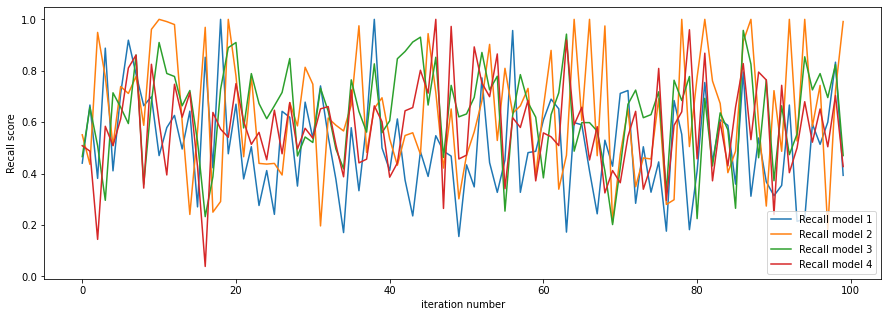

In [16]:
## plotting the data

plt.figure(figsize=(15, 5))
plt.plot(recalls_md1, label = 'Recall model 1')
plt.plot(recalls_md2, label = 'Recall model 2')
plt.plot(recalls_md3, label = 'Recall model 3')
plt.plot(recalls_md4, label = 'Recall model 4')
plt.ylabel('Recall score')
plt.xlabel('iteration number')
plt.legend(loc = 'lower right')


In [8]:
print('The average recall value for model 1 is', round(np.mean(recalls_md1), 4), 
      ', for model 2 is', round(np.mean(recalls_md2), 4),
     ', for model 3 is', round(np.mean(recalls_md3), 4), 
     ' and for model 4 is', round(np.mean(recalls_md4), 4))

The average recall value for model 1 is 0.6448 , for model 2 is  0.7554 , for model 3 is  0.6985  and for model 4 is  0.6701


In [ ]:
## Based on both the graph (where orange, which is model 2, looks higher more of the time) and the average recall values
## (with model 2 having the highest average recall), I would choose model 2 (the MLP using ReLU and SoftMax)
## for predicting 10YearCHD.